In [1]:
from ramCOH.signal_processing import functions as f
from ramCOH.signal_processing import curves as c
import ramCOH.raman as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
ne_file = r"./neon/Ne_2021_02_24_10_07_58_532nm_Edge_100%_Cuvette_H50_1800 (450-850nm)_30s x 2_01.txt"
x, y = np.genfromtxt(ne_file, unpack=True)

In [3]:
neon = ram.neon(x, y)
neon.baselineCorrect(neon.birs, smooth_factor=1)
neon.calculate_noise()
neon.noise

# hasattr(neon, "birs")

1.7472304906226706

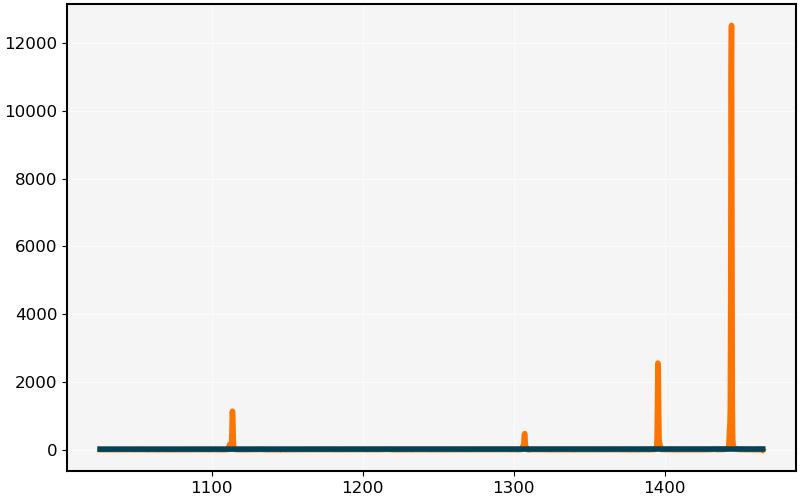

In [4]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(neon.x, neon.intensities["BC"])
plt.plot(neon.x, neon.baseline)

plt.show()

In [7]:
neon.deconvolve(noise=neon.noise, threshold_scale=0.6, max_iterations=2)

/Users/thomas/Desktop/ramCOH/ramCOH/signal_processing/deconvolution.py:147: UserWarning: max iterations reached: 2
  warnings.warn(f"max iterations reached: {max_iterations}")


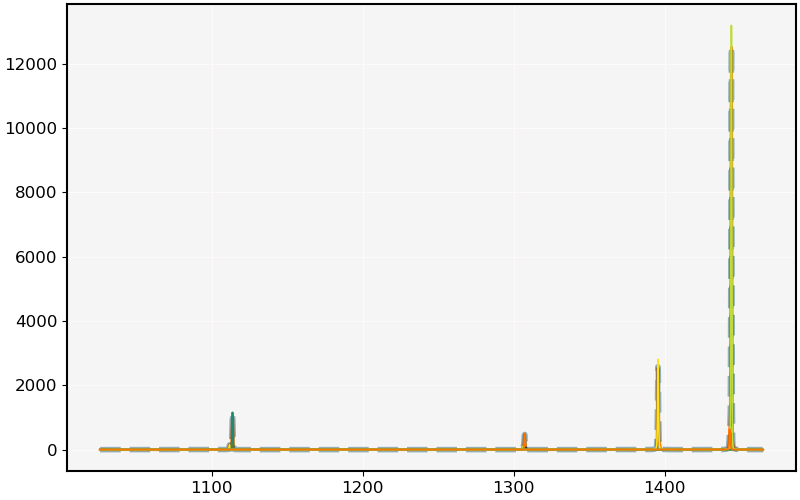

In [8]:
stepsize = abs(np.diff(x).mean())
x_curve = np.arange(x.min(), x.max(), stepsize / 10)

%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(neon.x, neon.intensities["BC"], linewidth=2)
plt.plot(neon.x, c.sum_GaussLorentz(neon.x, *neon.deconvolution_parameters), alpha=0.4, linestyle="dashed")
for curve in neon.deconvoluted_peaks:
    plt.plot(x_curve, c.GaussLorentz(x_curve, **curve), linewidth=1.2)


In [7]:
neon.deconvolution_parameters

[array([1111.91448844, 1113.87456014, 1216.81904347, 1306.16008453,
        1307.23558857, 1308.2320538 , 1395.59602167, 1396.70968311,
        1444.14578992, 1443.14968779, 1445.20863879]),
 array([  138.82754106,  1145.95480842,   351.91052084,    94.85725661,
          519.06151179,    68.75231964,  2789.26473887,   153.5865455 ,
        13094.1025119 ,   726.80161607,   147.19631626]),
 array([0.31419762, 0.30538884, 0.31118439, 0.31853818, 0.30866037,
        0.23216339, 0.30955136, 0.25568852, 0.29096833, 0.3846022 ,
        0.42207895]),
 array([3.11126494e-01, 1.11486760e-01, 2.57072649e-01, 2.82619058e-23,
        2.82166829e-01, 2.45256258e-16, 1.70011595e-01, 4.33980908e-13,
        4.13296189e-29, 4.19730089e-01, 1.00000000e+00]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]